In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Traffic.csv")

In [5]:
# Data Preprocessing

# Combine Date and Time to create a full datetime column (optional for future use)
df['Timestamp'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce')

# Convert 'Time' to hour for easier grouping
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce').dt.hour

# Fill missing Hour values if any (e.g., due to parsing)
df['Hour'] = df['Hour'].ffill().astype(int)

In [7]:
# 1. Traffic Density Over Time (Average traffic per hour)
avg_traffic_by_hour = df.groupby('Hour')['Total'].mean()

In [9]:
# 2. Peak Hours (top 5 busiest hours)
peak_hours = avg_traffic_by_hour.sort_values(ascending=False).head(5)

# 3. Traffic Pattern by Day of Week
traffic_by_day = df.groupby('Day of the week')['Total'].mean().sort_values()

In [11]:
# 4. Traffic Situation Distribution (Categorical)
situation_counts = df['Traffic Situation'].value_counts()

# 5. Anomaly Detection: Simple rule — if traffic is 2 std devs above the mean
threshold = df['Total'].mean() + 2 * df['Total'].std()
anomalies = df[df['Total'] > threshold]

In [13]:
# 6. Optional: Predict Total Traffic using Regression

features = df[['Hour', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']]
target = df['Total']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
score = reg_model.score(X_test, y_test)

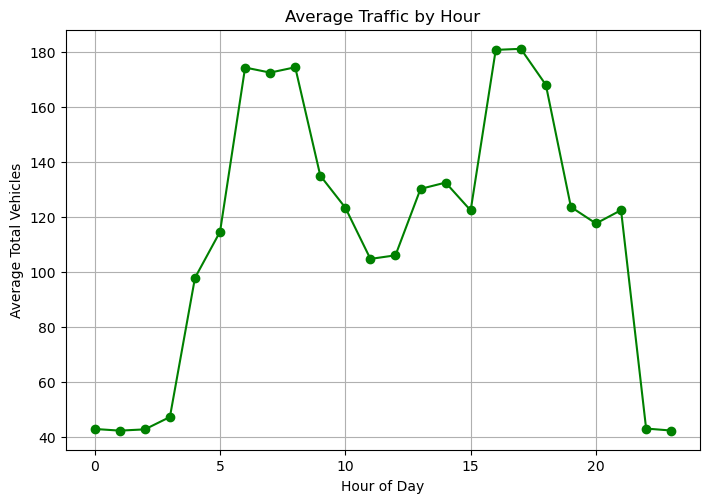

In [15]:
# Visualization
plt.figure(figsize=(18, 12))

# Average Traffic by Hour
plt.subplot(2, 2, 1)
avg_traffic_by_hour.plot(kind='line', marker='o', color='green')
plt.title("Average Traffic by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Vehicles")
plt.grid(True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Wednesday')])

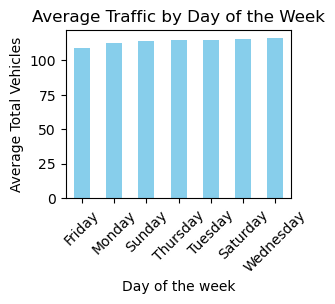

In [17]:
# Traffic by Day of the Week
plt.subplot(2, 2, 2)
traffic_by_day.plot(kind='bar', color='skyblue')
plt.title("Average Traffic by Day of the Week")
plt.ylabel("Average Total Vehicles")
plt.xticks(rotation=45)

Text(0, 0.5, '')

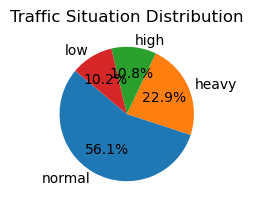

In [19]:
# Traffic Situation Distribution
plt.subplot(2, 2, 3)
situation_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Traffic Situation Distribution")
plt.ylabel("")

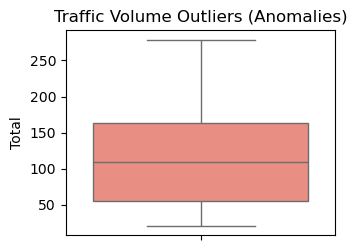

In [21]:
# Anomalies in Traffic
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Total'], color='salmon')
plt.title("Traffic Volume Outliers (Anomalies)")

plt.tight_layout()
plt.show()

In [23]:
# Print Results
print("Top 5 Peak Hours:\n", peak_hours)
print("\nRegression Model Accuracy (R²):", round(score, 3))
print("\nAnomalies Detected:", len(anomalies))

Top 5 Peak Hours:
 Hour
17    181.048387
16    180.653226
8     174.346774
6     174.250000
7     172.403226
Name: Total, dtype: float64

Regression Model Accuracy (R²): 1.0

Anomalies Detected: 43
